## Iris Segmentation

Here we will attempt to perform iris segmentation using thresholding on grayscale images. The hope is to be able to find the outline of the pupil, as well as the eye catchlight.

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

#### Turning to Grayscale

In [38]:
img = Image.open('eye1.png').convert('LA')
img.save('greyscale.png')

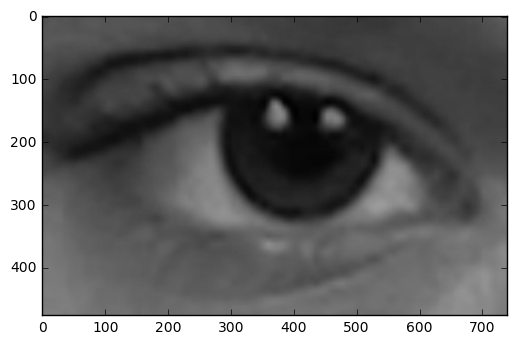

In [39]:
plt.imshow(img)
plt.show()

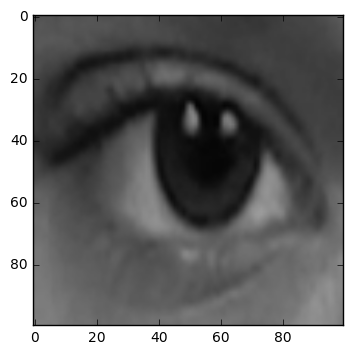

In [40]:
STANDARD_SIZE = (100,100)
img = img.resize(STANDARD_SIZE)
plt.imshow(img)
plt.show()

#### Thresholding

In [10]:
def img_to_array(img):
    img = img.resize(STANDARD_SIZE)
    img = list(img.getdata())
    img = map(list, img)
    img = np.array(img)
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]

In [32]:
ret,thresh1 = cv2.threshold(img_to_array(img).astype(np.uint8),127,255,cv2.THRESH_BINARY)

In [45]:
imgThresh = Image.fromarray(thresh1, 'L')
imgThresh.save('threshImg.png')
imgThresh.show()

In [34]:
thresh1.shape

(20000, 1)

In [28]:
print thresh1[0]

[0]


In [44]:
img.size

(100, 100)

In [46]:
imgThresh.size

(1, 20000)